## Problem Objective
As a data scientist, you should perform exploratory data analysis and cluster 
analysis to create cohorts of songs. The goal is to better understand the various 
factors that create a cohort of songs.

In [96]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

### Steps to perform
#### 1. Initial data inspection and data cleaning:

    a. Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries    and rectify them as needed.

In [2]:
cohort_df=pd.read_csv("rolling_stones_spotify_datasets.csv",index_col='release_date')
cohort_df

,Unnamed: 0,name,album,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
release_date,,,,,,,,,,,,,,,,,
2022-06-10,0,Concert Intro Music - Live,Licked Live In NYC,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
2022-06-10,1,Street Fighting Man - Live,Licked Live In NYC,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2022-06-10,2,Start Me Up - Live,Licked Live In NYC,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
2022-06-10,3,If You Can't Rock Me - Live,Licked Live In NYC,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
2022-06-10,4,Don’t Stop - Live,Licked Live In NYC,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964-04-16,1605,Carol,The Rolling Stones,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1964-04-16,1606,Tell Me,The Rolling Stones,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1964-04-16,1607,Can I Get A Witness,The Rolling Stones,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080


In [3]:
#Check info
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 2022-06-10 to 1964-04-16
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null 

In [4]:
cohort_df.shape

(1610, 17)

In [5]:
#Remove irrelevant columns
cohort_df.drop(['Unnamed: 0','uri','id'],axis=1,inplace=True)
cohort_df

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
release_date,,,,,,,,,,,,,,
2022-06-10,Concert Intro Music - Live,Licked Live In NYC,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
2022-06-10,Street Fighting Man - Live,Licked Live In NYC,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2022-06-10,Start Me Up - Live,Licked Live In NYC,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
2022-06-10,If You Can't Rock Me - Live,Licked Live In NYC,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
2022-06-10,Don’t Stop - Live,Licked Live In NYC,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964-04-16,Carol,The Rolling Stones,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1964-04-16,Tell Me,The Rolling Stones,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1964-04-16,Can I Get A Witness,The Rolling Stones,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080


In [6]:
cohort_df.shape

(1610, 14)

Outliers in 'track_number':
              track_number
release_date              
2022-06-10              22
2022-06-10              23
2022-05-13              22
2022-05-13              23
2021-10-22              22
...                    ...
1970-09-04              23
1970-09-04              24
1970-09-04              25
1970-09-04              26
1970-09-04              27

[77 rows x 1 columns]
Outliers in 'acousticness':
              acousticness
release_date              
2020-09-04           0.935
1986-03-24           0.994
1986-03-24           0.994
1976-04-23           0.939
Outliers in 'energy':
              energy
release_date        
1972-01-07     0.261
1972-01-07     0.252
1967-06-26     0.246
1967-06-26     0.248
1967-01-20     0.242
1967-01-20     0.250
Outliers in 'instrumentalness':
              instrumentalness
release_date                  
2022-06-10               0.996
2022-06-10               0.621
2022-06-10               0.722
2022-05-13               0.756


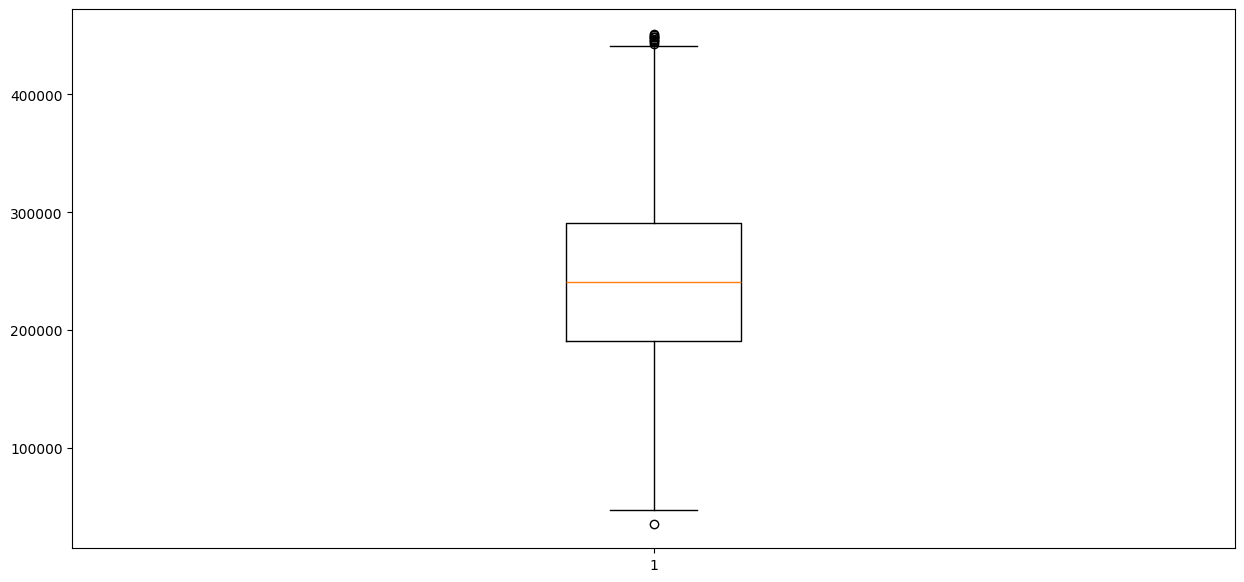

In [7]:
#Detect outliers and remove outliers
plt.figure(figsize=(15,7))
cohort_df_numerical=cohort_df.select_dtypes(include=['number'])
# Find outliers using IQR
for column in cohort_df_numerical.columns:
    Q1 = cohort_df_numerical[column].quantile(0.25)
    Q3 = cohort_df_numerical[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = cohort_df_numerical[(cohort_df_numerical[column] < lower_bound) |
                            (cohort_df_numerical[column] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers[[column]])

# Filter out rows with outliers
    cohort_df_numerical = cohort_df_numerical[(cohort_df_numerical[column] >= lower_bound) & (cohort_df_numerical[column] <= upper_bound)]
plt.boxplot(cohort_df_numerical[[column]])
plt.show()

### 2. Refine the data for further processing based on your findings

In [9]:
cohort_df

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
release_date,,,,,,,,,,,,,,
2022-06-10,Concert Intro Music - Live,Licked Live In NYC,1,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
2022-06-10,Street Fighting Man - Live,Licked Live In NYC,2,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2022-06-10,Start Me Up - Live,Licked Live In NYC,3,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
2022-06-10,If You Can't Rock Me - Live,Licked Live In NYC,4,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
2022-06-10,Don’t Stop - Live,Licked Live In NYC,5,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964-04-16,Carol,The Rolling Stones,8,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1964-04-16,Tell Me,The Rolling Stones,9,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1964-04-16,Can I Get A Witness,The Rolling Stones,10,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080


## Inferences
1. Based on our data, 1610 rows × 15 columns, 47 tracks

### 3. Perform exploratory data analysis and feature engineering
a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [62]:
cohort_df[cohort_df['popularity']>=67]['album'].value_counts()

album
Some Girls                                    2
Let It Bleed                                  2
Tattoo You (2009 Re-Mastered)                 1
Goats Head Soup (Remastered 2009)             1
Sticky Fingers (Remastered)                   1
Beggars Banquet (50th Anniversary Edition)    1
Aftermath                                     1
Out Of Our Heads                              1
Name: count, dtype: int64

C:\Users\Keert\AppData\Local\Temp\ipykernel_8724\3923106319.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=album_most_popular_songs.values, y=album_most_popular_songs.index, palette='viridis')
C:\Users\Keert\AppData\Local\Temp\ipykernel_8724\3923106319.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


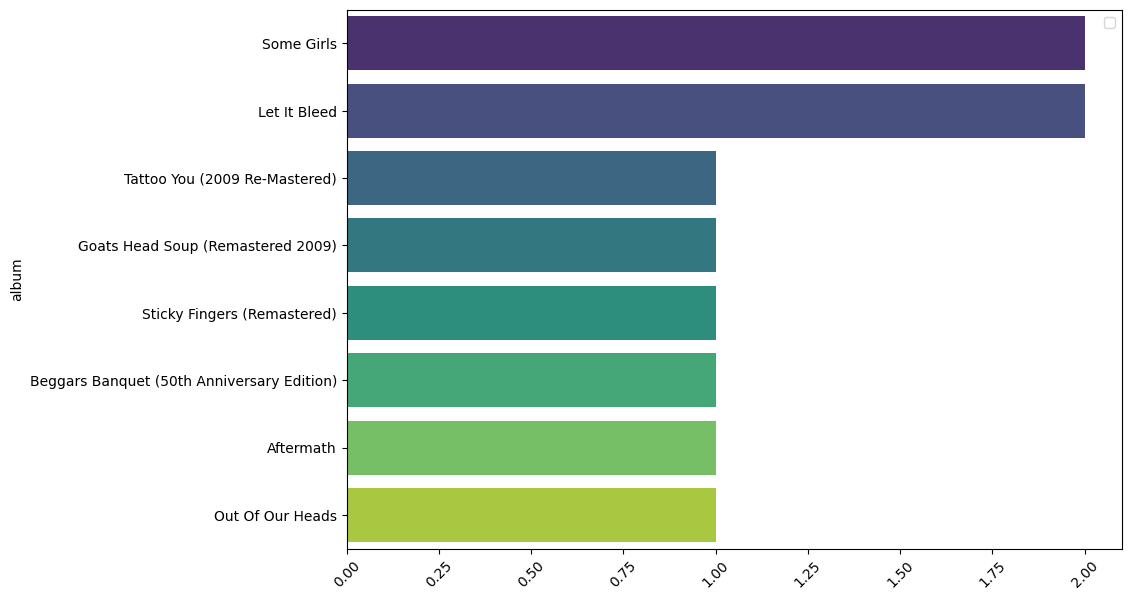

In [63]:
# Filter songs with popularity >= 70 and Count popular songs by album
album_most_popular_songs=cohort_df[cohort_df['popularity']>=67]['album'].value_counts()



plt.figure(figsize=(10,7))
# Plot all albums with popular song counts
sns.barplot(x=album_most_popular_songs.values, y=album_most_popular_songs.index, palette='viridis')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Inferences
Based on the barplot plotted, Some Girls and Let It bleed are the 2 albums which has the most number of popular songs

b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

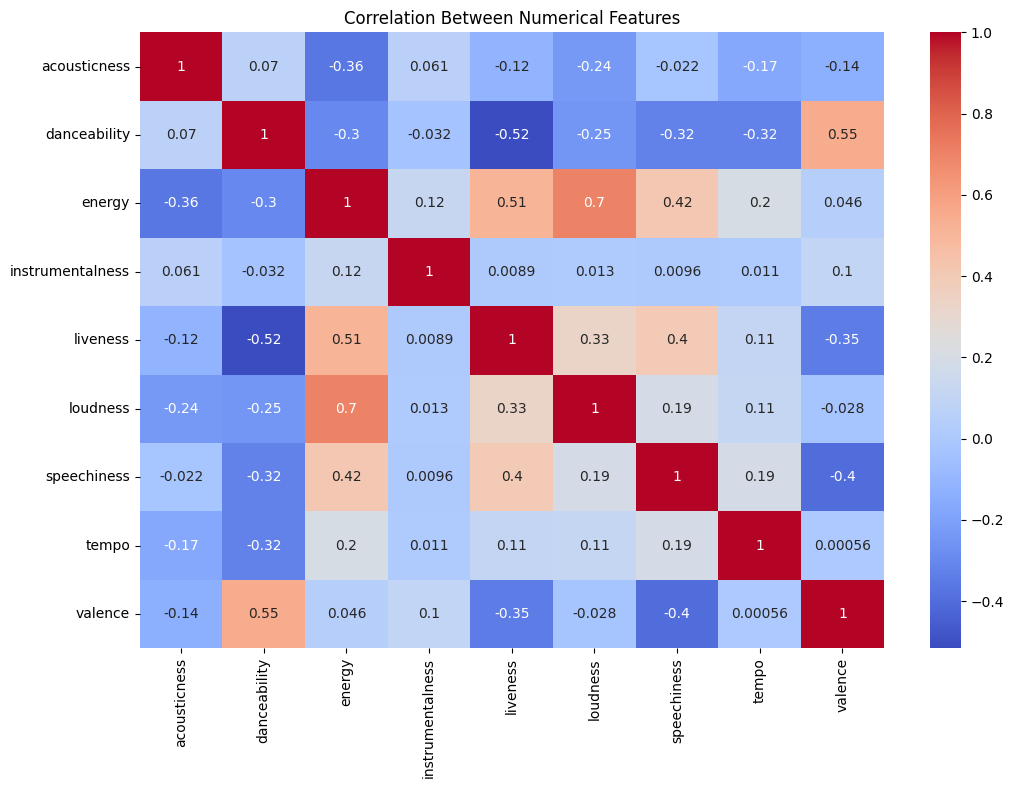

In [87]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_df.iloc[:,3:12].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between songs Features')
plt.show()

# Inferences
1. Based on the corr heatmap, loudness and energy has highest correlation (0.7) and liveness and danceability has the least correlation (-0.52)

c. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

count
1    1318
2      89
3      38
Name: count, dtype: int64

In [95]:
cohort_features_df=cohort_df.iloc[:,3:12]
cohort_features_df['popularity']=cohort_df['popularity']

corr_matrix=cohort_features_df.corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.156323
danceability        0.141205
acousticness        0.108046
valence             0.065333
instrumentalness   -0.010612
energy             -0.057272
tempo              -0.061061
speechiness        -0.136745
liveness           -0.205845
Name: popularity, dtype: float64

d. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

In [100]:
pca = PCA()
pca_data = pca.fit_transform(cohort_df_numerical)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,6931.192482,8.400534,14.431395,-4.275855,1.688188,0.633935,0.229816,0.079986,-0.113873,0.037867,0.189297,-0.014222
1,16918.192529,7.354441,14.077963,-3.417328,1.462134,0.605346,0.187444,0.074912,-0.101821,0.043299,0.364999,0.024539
2,58864.192444,9.330362,10.987766,-2.126495,0.942182,0.582544,0.237546,-0.019987,-0.097130,0.107920,0.030656,-0.007988
3,-1948.806521,-21.674252,10.462368,-0.731747,1.371549,0.499575,0.242098,-0.225190,-0.140506,0.133230,0.111879,-0.007864
4,-735.805695,-45.746679,9.665414,0.023846,0.264277,0.710189,0.201591,0.149004,-0.162242,-0.045296,-0.065265,0.031456
...,...,...,...,...,...,...,...,...,...,...,...,...
1060,-92161.808867,50.586590,22.072274,3.706005,-2.457072,0.096084,-0.318144,0.144140,-0.159149,0.050591,-0.082170,-0.023258
1061,-975.807114,-1.449020,15.537496,2.824577,-2.929771,0.307544,-0.143338,-0.234782,0.045580,0.065116,-0.022649,0.019824
1062,-70161.806305,-28.672825,10.392691,3.913589,-0.402164,-0.280077,-0.078886,0.185558,0.034364,0.162094,-0.007155,0.021672
1063,-124561.806521,-24.918636,8.598807,5.326307,-1.446431,-0.004698,0.074458,-0.123898,0.149338,0.069617,0.004311,0.018387


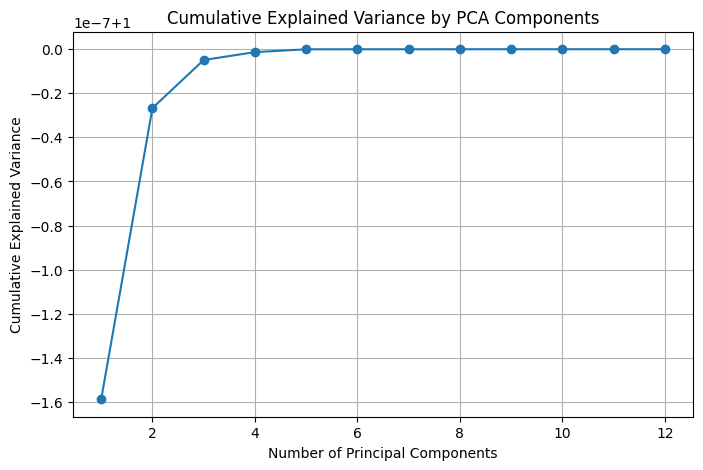

In [99]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [101]:
# Explained variance for each component
explained_var = pca.explained_variance_ratio_

# Cumulative variance
cumulative_var = explained_var.cumsum()

# Display as a table
import pandas as pd
pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(explained_var))],
    'Explained_Variance': explained_var,
    'Cumulative_Variance': cumulative_var
})

,PC,Explained_Variance,Cumulative_Variance
0,PC1,9.999998e-01,1.0
1,PC2,1.321150e-07,1.0
2,PC3,2.180898e-08,1.0
3,PC4,3.569786e-09,1.0
4,PC5,1.280603e-09,1.0
5,PC6,1.774803e-11,1.0
6,PC7,9.417808e-12,1.0
7,PC8,6.605260e-12,1.0
8,PC9,1.932535e-12,1.0
9,PC10,1.526028e-12,1.0


### 4. Perform cluster analysis
a. Identify the right number of clusters

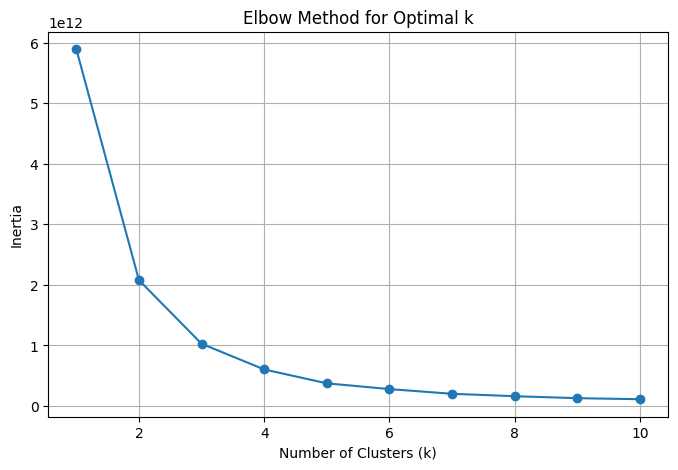

In [102]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


b. Use appropriate clustering algorithms

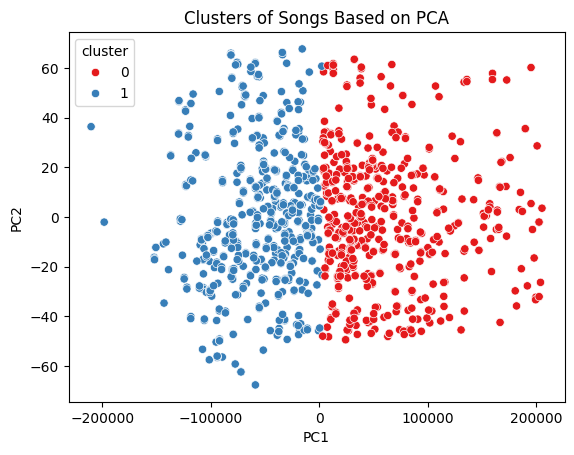

In [116]:
from sklearn.cluster import KMeans

# Use first 2 or 3 PCs
pca_features = pca_df[['PC1', 'PC2']]

# Cluster
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add to DataFrame
pca_df['cluster'] = clusters
cohort_df_numerical['cluster'] = clusters

# Visualize clusters
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set1')
plt.title("Clusters of Songs Based on PCA")
plt.show()

c. Define each cluster based on the features

In [117]:
# Choose the original numerical features
feature_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness',
                   'valence', 'tempo','popularity','track_number']

# Group by cluster and calculate means
cluster_profiles = cohort_df_numerical.groupby('cluster')[feature_columns].mean().round(2)
cluster_profiles

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,track_number
cluster,,,,,,,,,,,
0,0.46,0.80,-6.39,0.06,0.26,0.04,0.55,0.54,120.71,21.66,8.34
1,0.51,0.75,-7.61,0.06,0.23,0.05,0.38,0.64,125.03,18.80,6.96


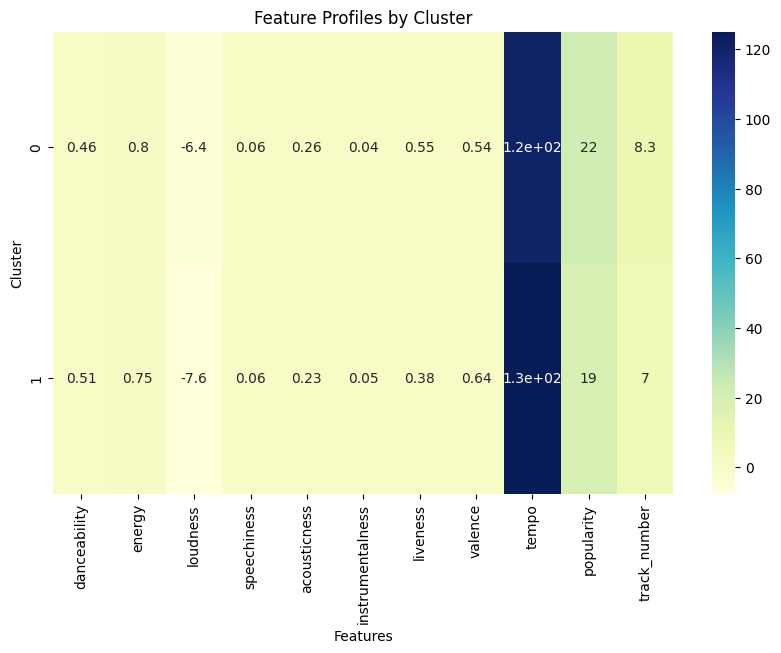

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles, annot=True, cmap='YlGnBu')
plt.title("Feature Profiles by Cluster")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()